In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
!pip install -U pylibjpeg pylibjpeg-openjpeg pylibjpeg-libjpeg pydicom python-gdcm

In [2]:
import warnings
warnings.filterwarnings("ignore")
import os
from tqdm import tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pydicom
from PIL import Image

In [3]:
df = pd.read_csv('/kaggle/input/rsna-breast-cancer-detection/train.csv')
source_path = "/kaggle/input/rsna-breast-cancer-detection/train_images"

# Cancer and Normal Image

In [4]:
def plot_images(image_paths, rows=2, columns=2):
    fig = plt.figure(figsize=(20, 8))
    idx = 0
    for index, row in tqdm(image_paths.iterrows(), total=image_paths.shape[0]):
        filename = os.path.join(source_path, str(row['patient_id']), str(row['image_id'])+'.dcm')
        fig.add_subplot(rows, columns, idx+1)
        idx += 1
        img = pydicom.dcmread(filename)
        plt.imshow(img.pixel_array, cmap='gray_r')
        #plt.imshow(img.pixel_array, cmap=plt.cm.bone)
        plt.title('cancer: ' + str(row['cancer']) + ', invasive cancer: ' + str(row['invasive']) + ', view: ' + row['view'] + '\nbiopsy: ' + str(row['biopsy']) + ', implant: ' + str(row['implant']))
    plt.show()

**Images With Cancer**

Images with cancer: 


100%|██████████| 4/4 [00:04<00:00,  1.03s/it]


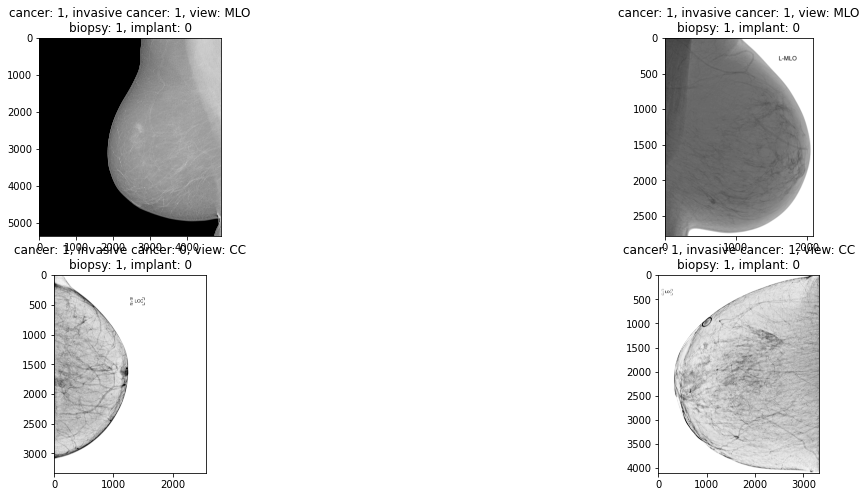

In [8]:
print("Images with cancer: ")
temp = df[df['cancer']==1]
temp = temp.sample(4, replace=False)
plot_images(temp)

**Images without cancer**

Images without cancer: 


100%|██████████| 4/4 [00:02<00:00,  1.63it/s]


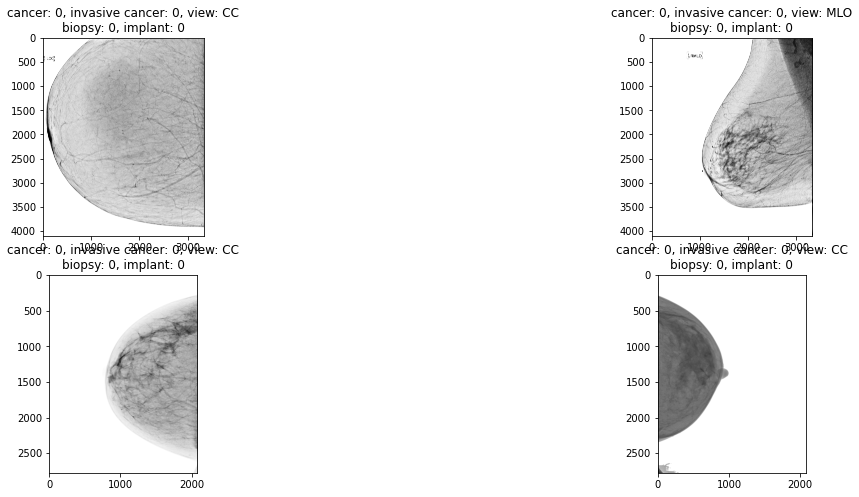

In [9]:
print("Images without cancer: ")
temp = df[df['cancer']==0]
temp = temp.sample(4, replace=False)
plot_images(temp)

As we can see it is very difficult to conclude that the image has cancer or not 

# Images with Invasive Cancer and Cancer which is not invasive

Images of invasive cancer: 


100%|██████████| 4/4 [00:02<00:00,  1.44it/s]


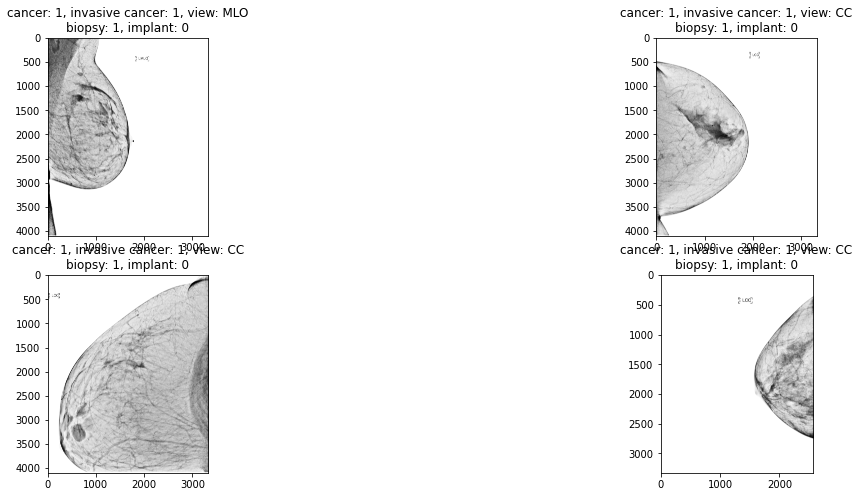

In [7]:
print("Images of invasive cancer: ")
temp = df[df['invasive']==1]
temp = temp.sample(4, replace=False)
plot_images(temp)

Images with cancer but not invasive: 


100%|██████████| 4/4 [00:01<00:00,  2.19it/s]


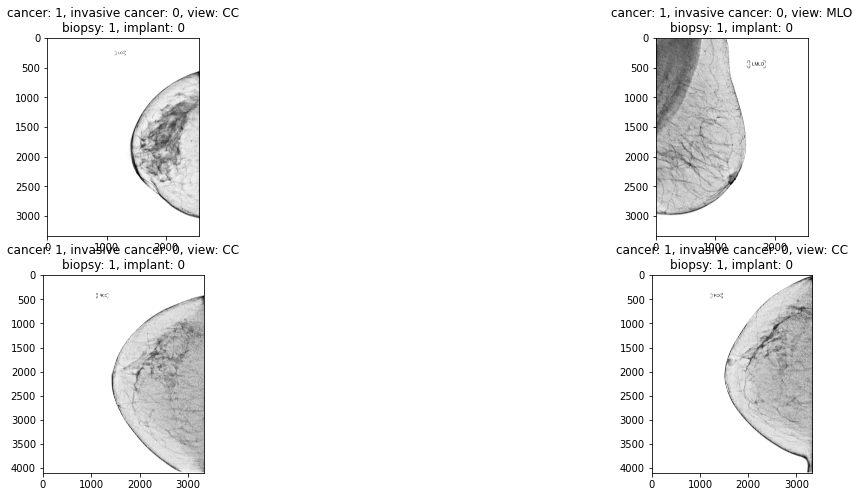

In [10]:
print("Images with cancer but not invasive: ")
temp = df[(df['cancer']==1) & (df['invasive']==0)]
temp = temp.sample(4, replace=False)
plot_images(temp)

# Images with implant and without implant and have cancer

Images with implant and cancer: 


100%|██████████| 4/4 [00:01<00:00,  2.37it/s]


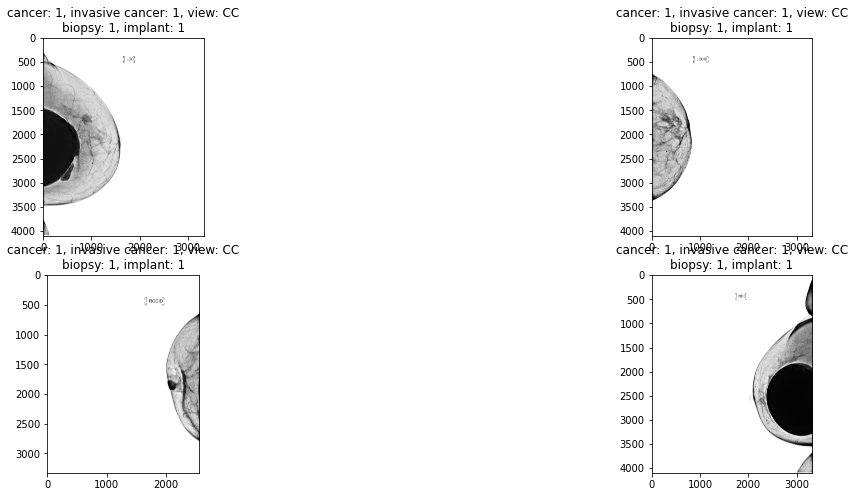

In [11]:
print("Images with implant and cancer: ")
temp = df[(df['cancer']==1) & (df['implant']==1)]
temp = temp.sample(4, replace=False)
plot_images(temp)

Images without implant and cancer: 


100%|██████████| 4/4 [00:03<00:00,  1.32it/s]


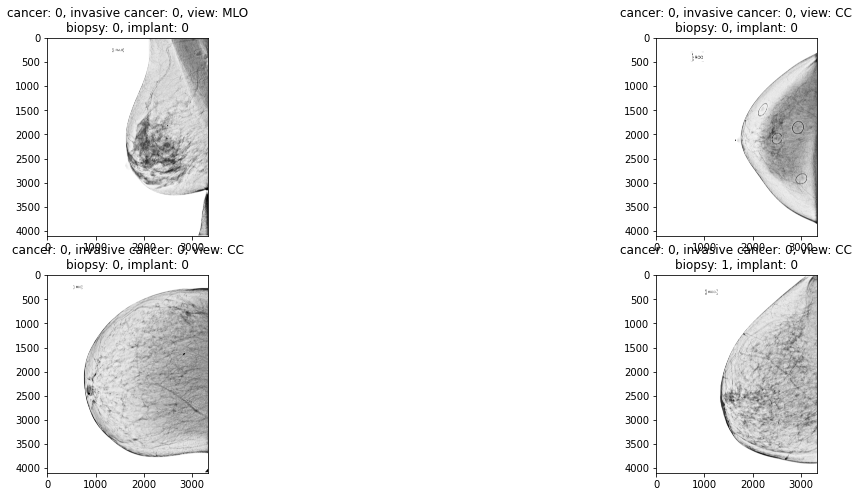

In [12]:
print("Images without implant and cancer: ")
temp = df[(df['cancer']==0) & (df['implant']==0)]
temp = temp.sample(4, replace=False)
plot_images(temp)

Images with implant and don't have cancer: 


100%|██████████| 4/4 [00:02<00:00,  1.88it/s]


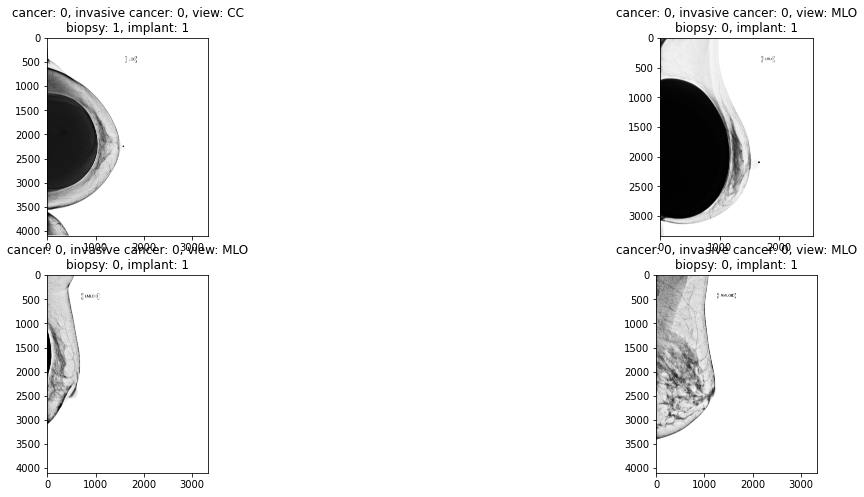

In [13]:
print("Images with implant and don't have cancer: ")
temp = df[(df['cancer']==0) & (df['implant']==1)]
temp = temp.sample(4, replace=False)
plot_images(temp)

It can be noted here that images with implant is hard to analyze which is clear from image as images with implant have a big dark spot which makes the analysis more difficult.

# Images of patients with and without biopsy

Images with biopsy: 


100%|██████████| 4/4 [00:02<00:00,  1.47it/s]


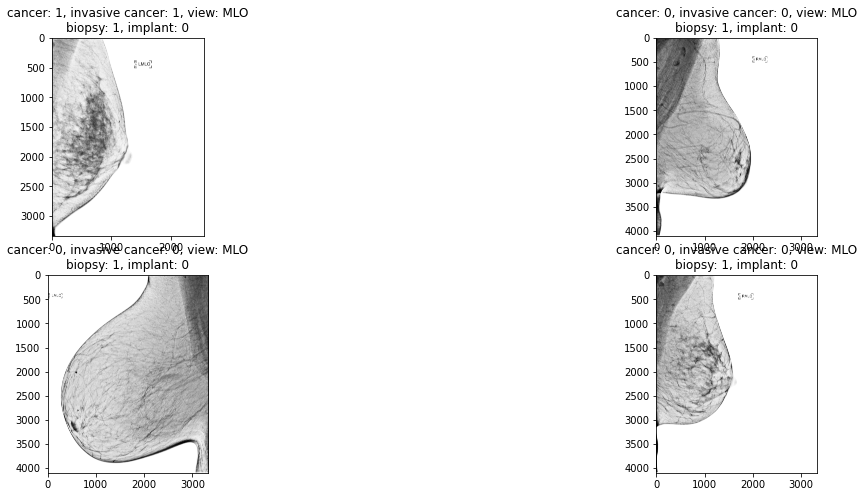

In [16]:
print("Images with biopsy: ")
temp = df[df['biopsy']==1]
temp = temp.sample(4, replace=False)
plot_images(temp)

Images without biopsy: 


100%|██████████| 4/4 [00:02<00:00,  1.50it/s]


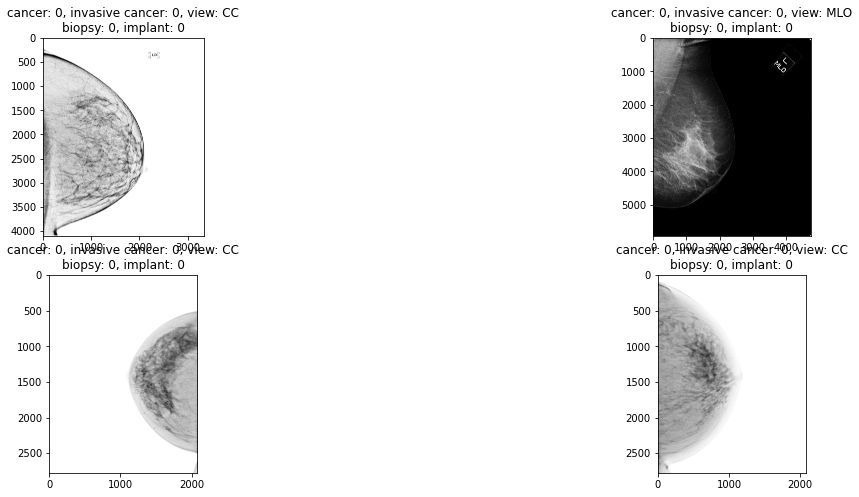

In [17]:
print("Images without biopsy: ")
temp = df[df['biopsy']==0]
temp = temp.sample(4, replace=False)
plot_images(temp)

It hard to classify that someone had biopsy or not from these images for a person who doesn't belong from medical domain.

# View: CC

Images with 'CC' view and have cancer: 


100%|██████████| 4/4 [00:01<00:00,  2.23it/s]


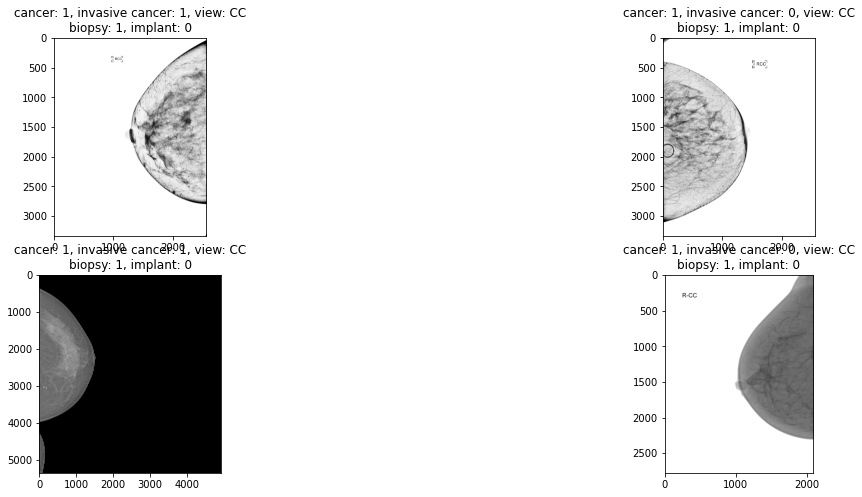

In [18]:
print("Images with 'CC' view and have cancer: ")
temp = df[(df['view']=='CC') & (df['cancer']==1)]
temp = temp.sample(4, replace=False)
plot_images(temp)

Images with 'CC' view and without cancer: 


100%|██████████| 4/4 [00:03<00:00,  1.33it/s]


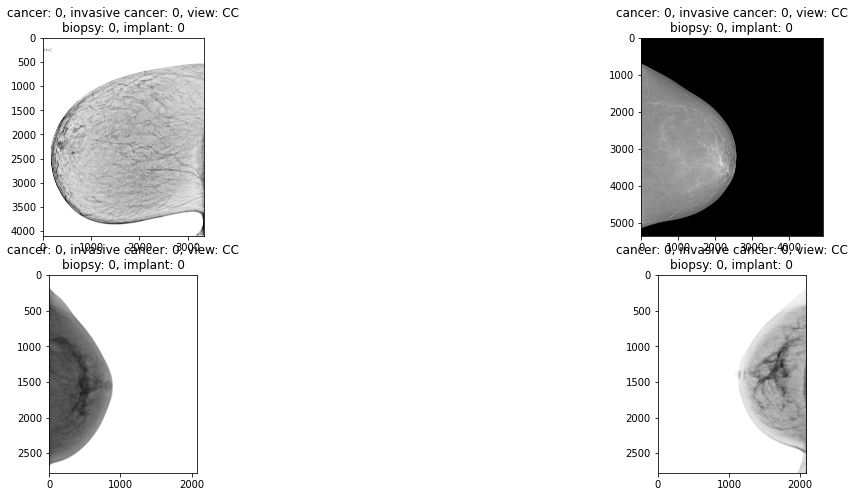

In [24]:
print("Images with 'CC' view and without cancer: ")
temp = df[(df['view']=='CC') & (df['cancer']==0)]
temp = temp.sample(4, replace=False)
plot_images(temp)

# View: MLO

Images with 'MLO' view and have cancer: 


100%|██████████| 4/4 [00:02<00:00,  1.88it/s]


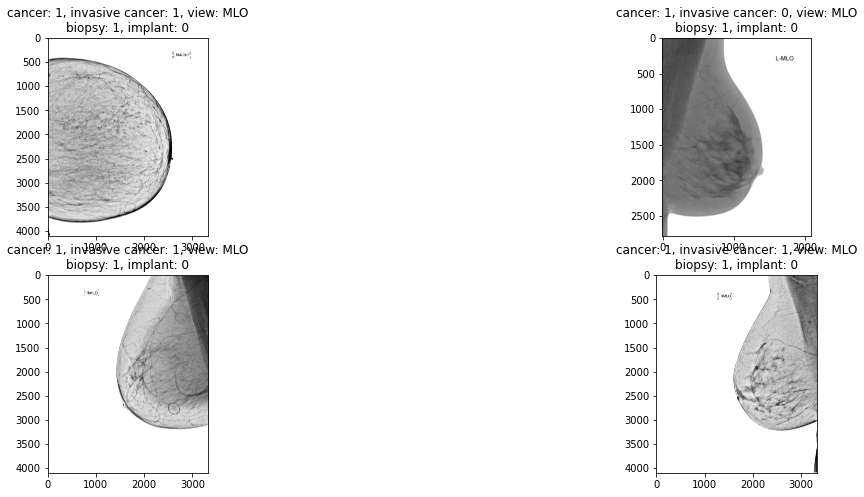

In [20]:
print("Images with 'MLO' view and have cancer: ")
temp = df[(df['view']=='MLO') & (df['cancer']==1)]
temp = temp.sample(4, replace=False)
plot_images(temp)

Images with 'MLO' view and without cancer: 


100%|██████████| 4/4 [00:02<00:00,  1.35it/s]


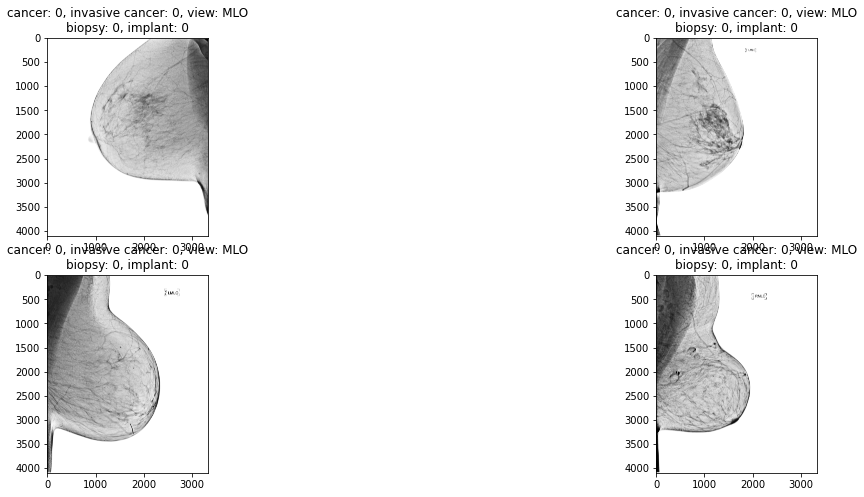

In [21]:
print("Images with 'MLO' view and without cancer: ")
temp = df[(df['view']=='MLO') & (df['cancer']==0)]
temp = temp.sample(4, replace=False)
plot_images(temp)

Irrespective of view it's very difficult to identify from a image that it has cancer or not

#  Images from difficult negative case

Images of difficult negative case: 


100%|██████████| 16/16 [00:14<00:00,  1.14it/s]


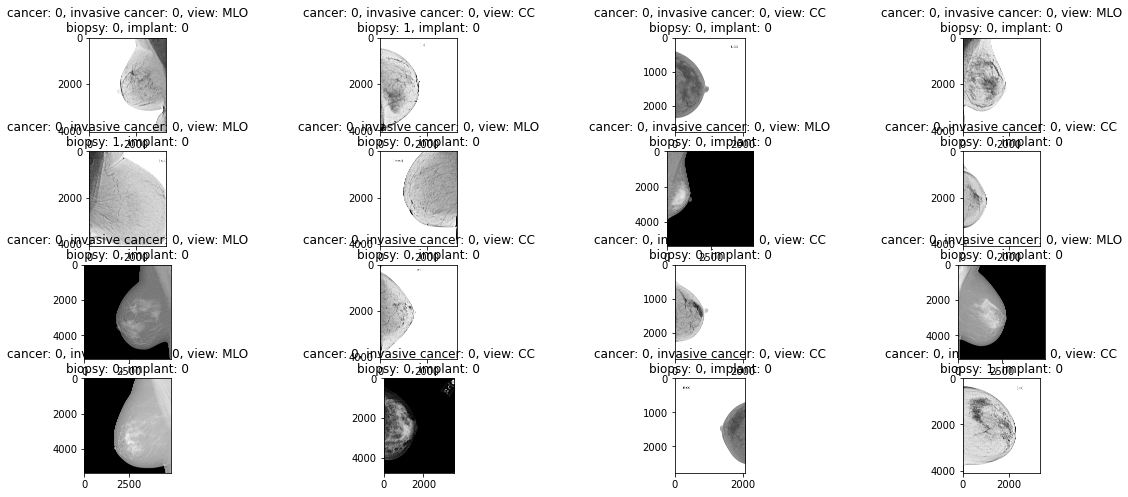

In [22]:
print("Images of difficult negative case: ")
temp = df[df['difficult_negative_case']==True]
temp = temp.sample(16, replace=False)
plot_images(temp,4,4)